In [1]:
import networkx as nx
import numpy as np
import helper_functions as hf 
COLORS="brgymcbrgymc"

import importlib
importlib.reload(hf)

import problem as pr
importlib.reload(pr)

<module 'problem' from '/home/lema/Documents/diplomska/problem.py'>

<class 'networkx.classes.multidigraph.MultiDiGraph'>


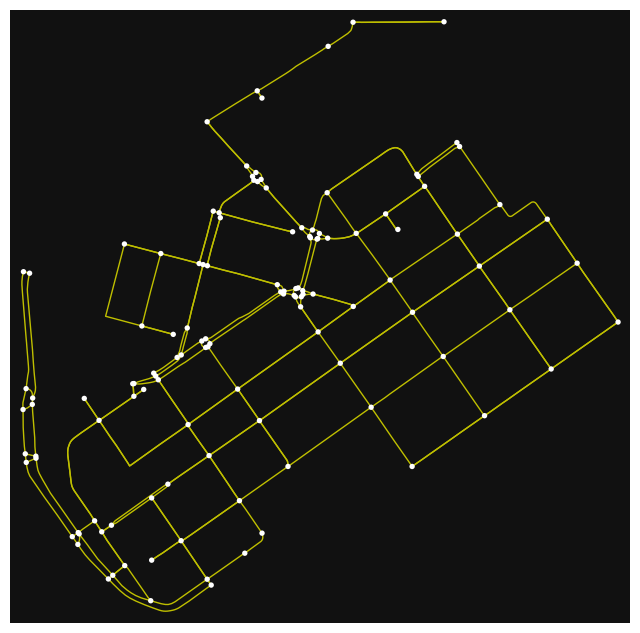

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

place = 'Kamppi, Helsinki, Finland'
graph = ox.graph_from_place(place,network_type='drive')

print(type(graph))
fig, ax = ox.plot_graph(graph,edge_color='y')


# ec = ox.plot.get_edge_colors_by_attr(graph, 'length', cmap='inferno') TODO
# fig, ax = ox.plot_graph(graph, edge_color=ec, edge_linewidth=2, node_size=0)


In [3]:
G_nodes = ox.graph_to_gdfs(graph,edges=False)
# 123 vozlišč

In [11]:
      
# hf.nastavi_ct(g,c_mode=2)
    

    
# plt.hist([l[i][2]["highway"] for i in range(len(l))])
# set([l[i][2]["highway"] for i in range(len(l))])
# LIST_OF_ROAD_TYPES = ['motorway','trunk','primary','primary_link','secondary','tertiary','unclassified','living_street','residential']
#ec = ox.plot.get_edge_colors_by_attr(g, 'c', cmap='inferno')
#fig, ax = ox.plot_graph(g, edge_color=ec, edge_linewidth=2, node_size=0)



In [15]:
list(g.edges(data=True))[0]

(25216594,
 1372425714,
 {'osmid': 23856784,
  'oneway': True,
  'lanes': '2',
  'name': 'Mechelininkatu',
  'highway': 'primary',
  'maxspeed': 40,
  'reversed': False,
  'length': 40.885,
  'geometry': <LINESTRING (24.921 60.165, 24.921 60.165, 24.921 60.165, 24.921 60.165, 24....>,
  'c': 2,
  't': 40.885})

In [7]:

# 0:
# 25291537
# 1:
# 25291565
# for e in g.edges():
#     if g.edges[e]["oneway"] == False:
#         pass
# ta je oneway = False in istocasno je podvojen tko da ne rabm podvajat
#print((25291537,25291565) in g.edges())
#(25291565,25291537) in g.edges()

In [4]:
# ZK = [(25216594,3177642345,1),(2037356632,25238874,1),(56115897, 56113314, 1)]
# ZK = hf.get_random_ZK(g,num_ZK=5,max_a=1)
# print(ZK)

In [3]:
# paths = hf.poklici_linprog(ZK,g,st_alternativ=10)
# paths

In [9]:
# fig, ax = ox.plot_graph_routes(graph,paths,route_colors=list(COLORS)[:len(paths)])
# for ci, path in enumerate(paths):
#     fig, ax = ox.plot_graph_route(graph,path,route_color=COLORS[ci])

In [10]:
# ZK = hf.get_random_ZK(g,num_ZK=5,max_a=2)
# print(ZK)

In [11]:
# _,_,t,c,_ = hf.sestavi_QBtca(ZK, g)
# print(t)
# print(c)

In [12]:
# from scipy.optimize import linprog
# f,B,c,M2,m_ZK = hf.nastavi_fbcmm(g,ZK,c,t)
# res = linprog(f, A_ub=B, b_ub=c, A_eq=M2, b_eq=m_ZK, integrality=1)
# print(res.x,res.fun,res.message)
# X = np.array(res.x).reshape(g.number_of_edges(),len(ZK))
# paths = hf.columns_to_paths(g,X)
# print(X)
# # path0 = hf.nodes_to_edges_path(hf.binary_vector_to_edges(X[:,0],g.edges()), inverse=True)
# # fig, ax = ox.plot_graph_route(graph,path0)
# fig, ax = ox.plot_graph_routes(graph,paths,route_colors=list(COLORS)[:len(paths)])
# # for ci, path in enumerate(paths):
# #     fig, ax = ox.plot_graph_route(graph,path,route_color=COLORS[ci])
# #TODO, mislm da ne dela capacity
# #X[X>0]

In [13]:
#c

seed - notes
13 - No path between 60069401 and 25416263.

In [67]:
# for i in range(20,30):
#     res = None
#     for j in [1,2]:
        
#         try:
#             p = pr.Problem(graph, None, ZK = None, ZK_shape=(3,2), ZK_seed = i, c_mode = j, t_mode= "time")
#             p.solve(mode="linprog_v1")
        
#             if res is None:
#                 res = p.results["linprog_v1"]["success"]
#             else:
#                 if res == p.results["linprog_v1"]["success"] and res == True:
#                     print(i)
#         except Exception:
#             pass

ZK_seed: 14
An alternative path wasn't found.
An alternative path wasn't found.
An alternative path wasn't found.
An alternative path wasn't found.
f_c_sums:  0 0.0
<class 'problem.Linprog_v1'>:
110.57805 Optimization terminated successfully. (HiGHS Status 7: Optimal) True


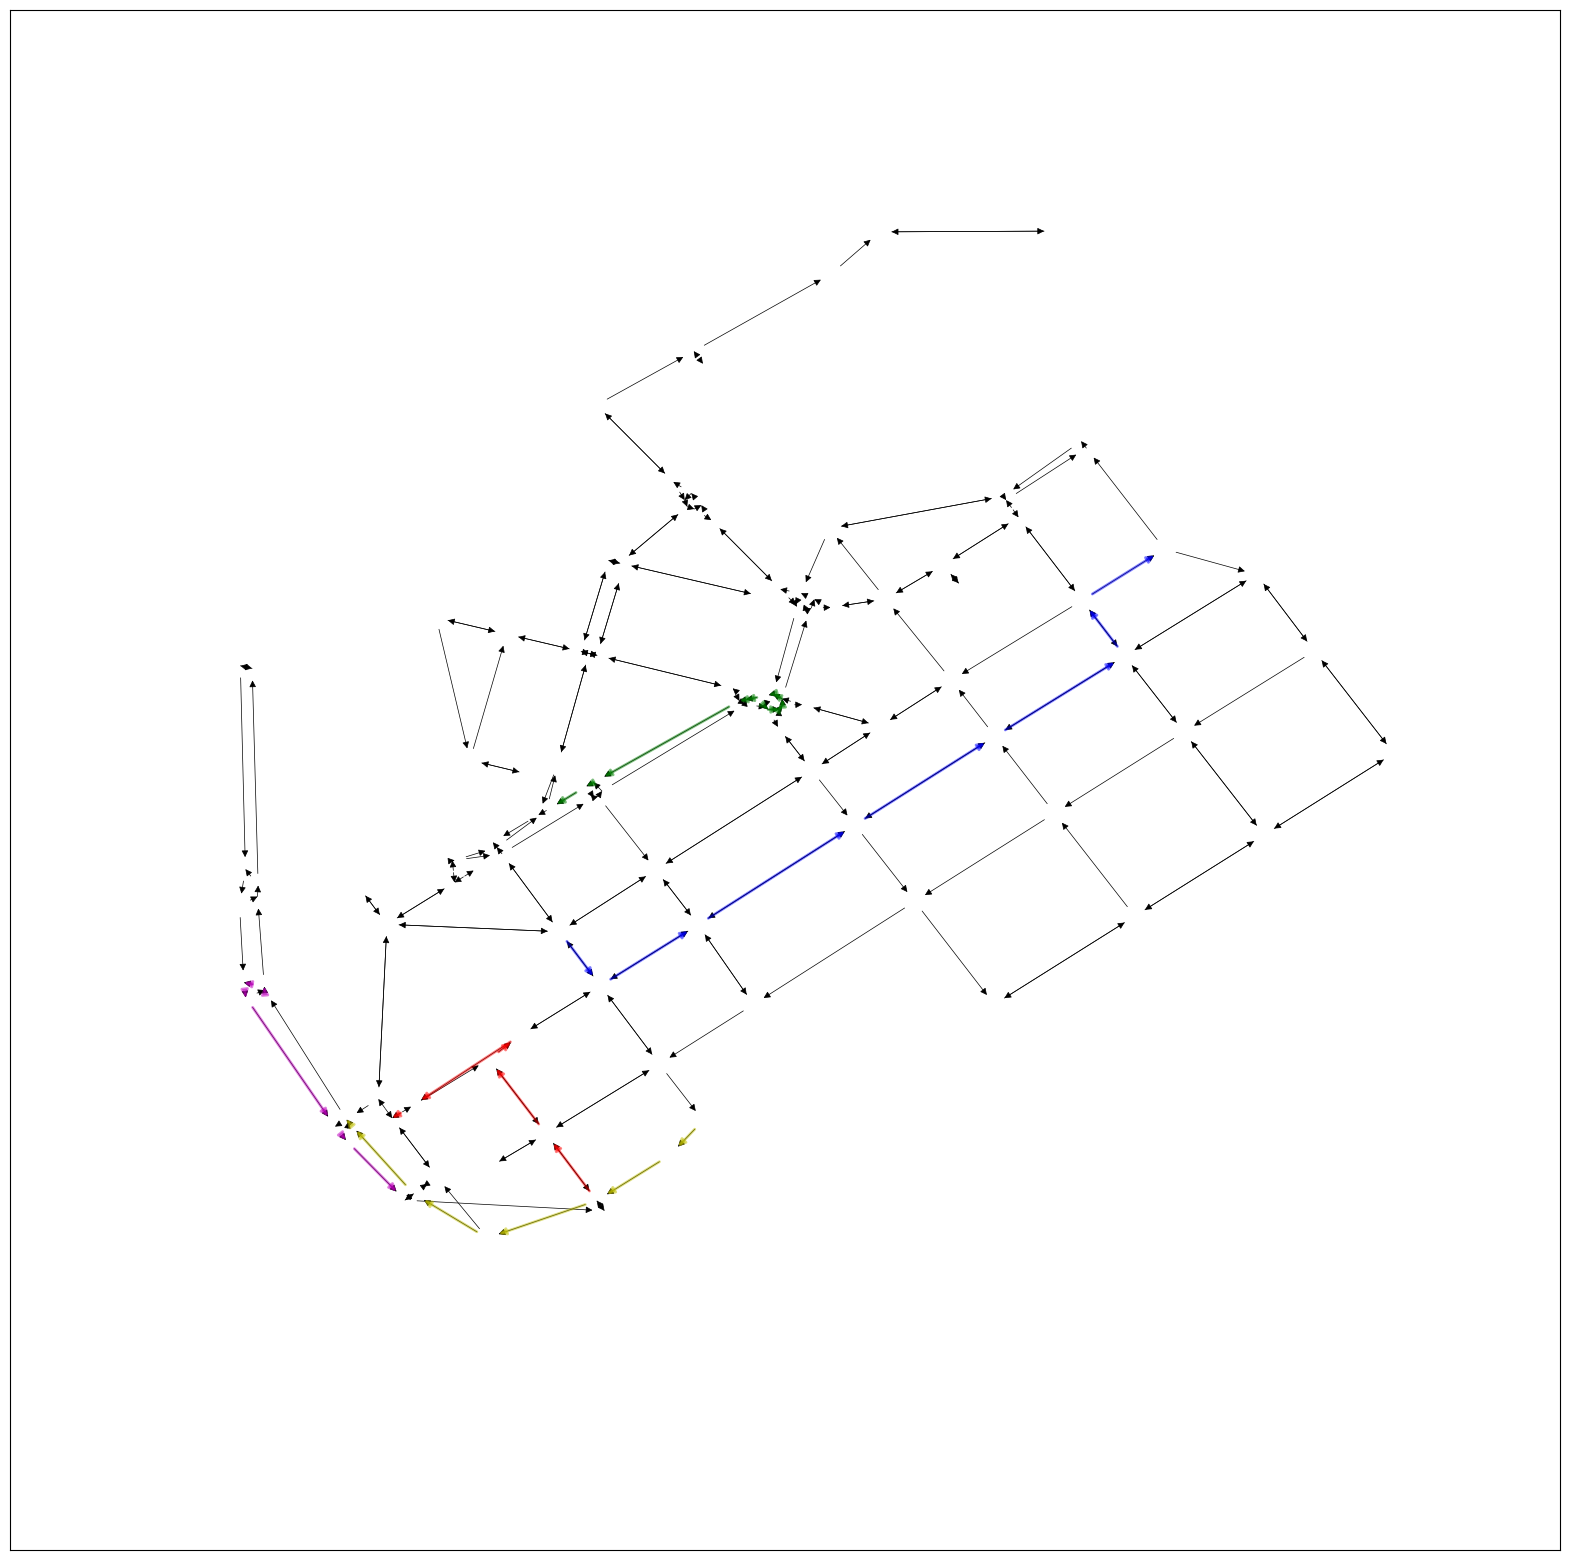

<class 'problem.Linprog_v2'>3:
110.57805 Optimization terminated successfully. (HiGHS Status 7: Optimal) True


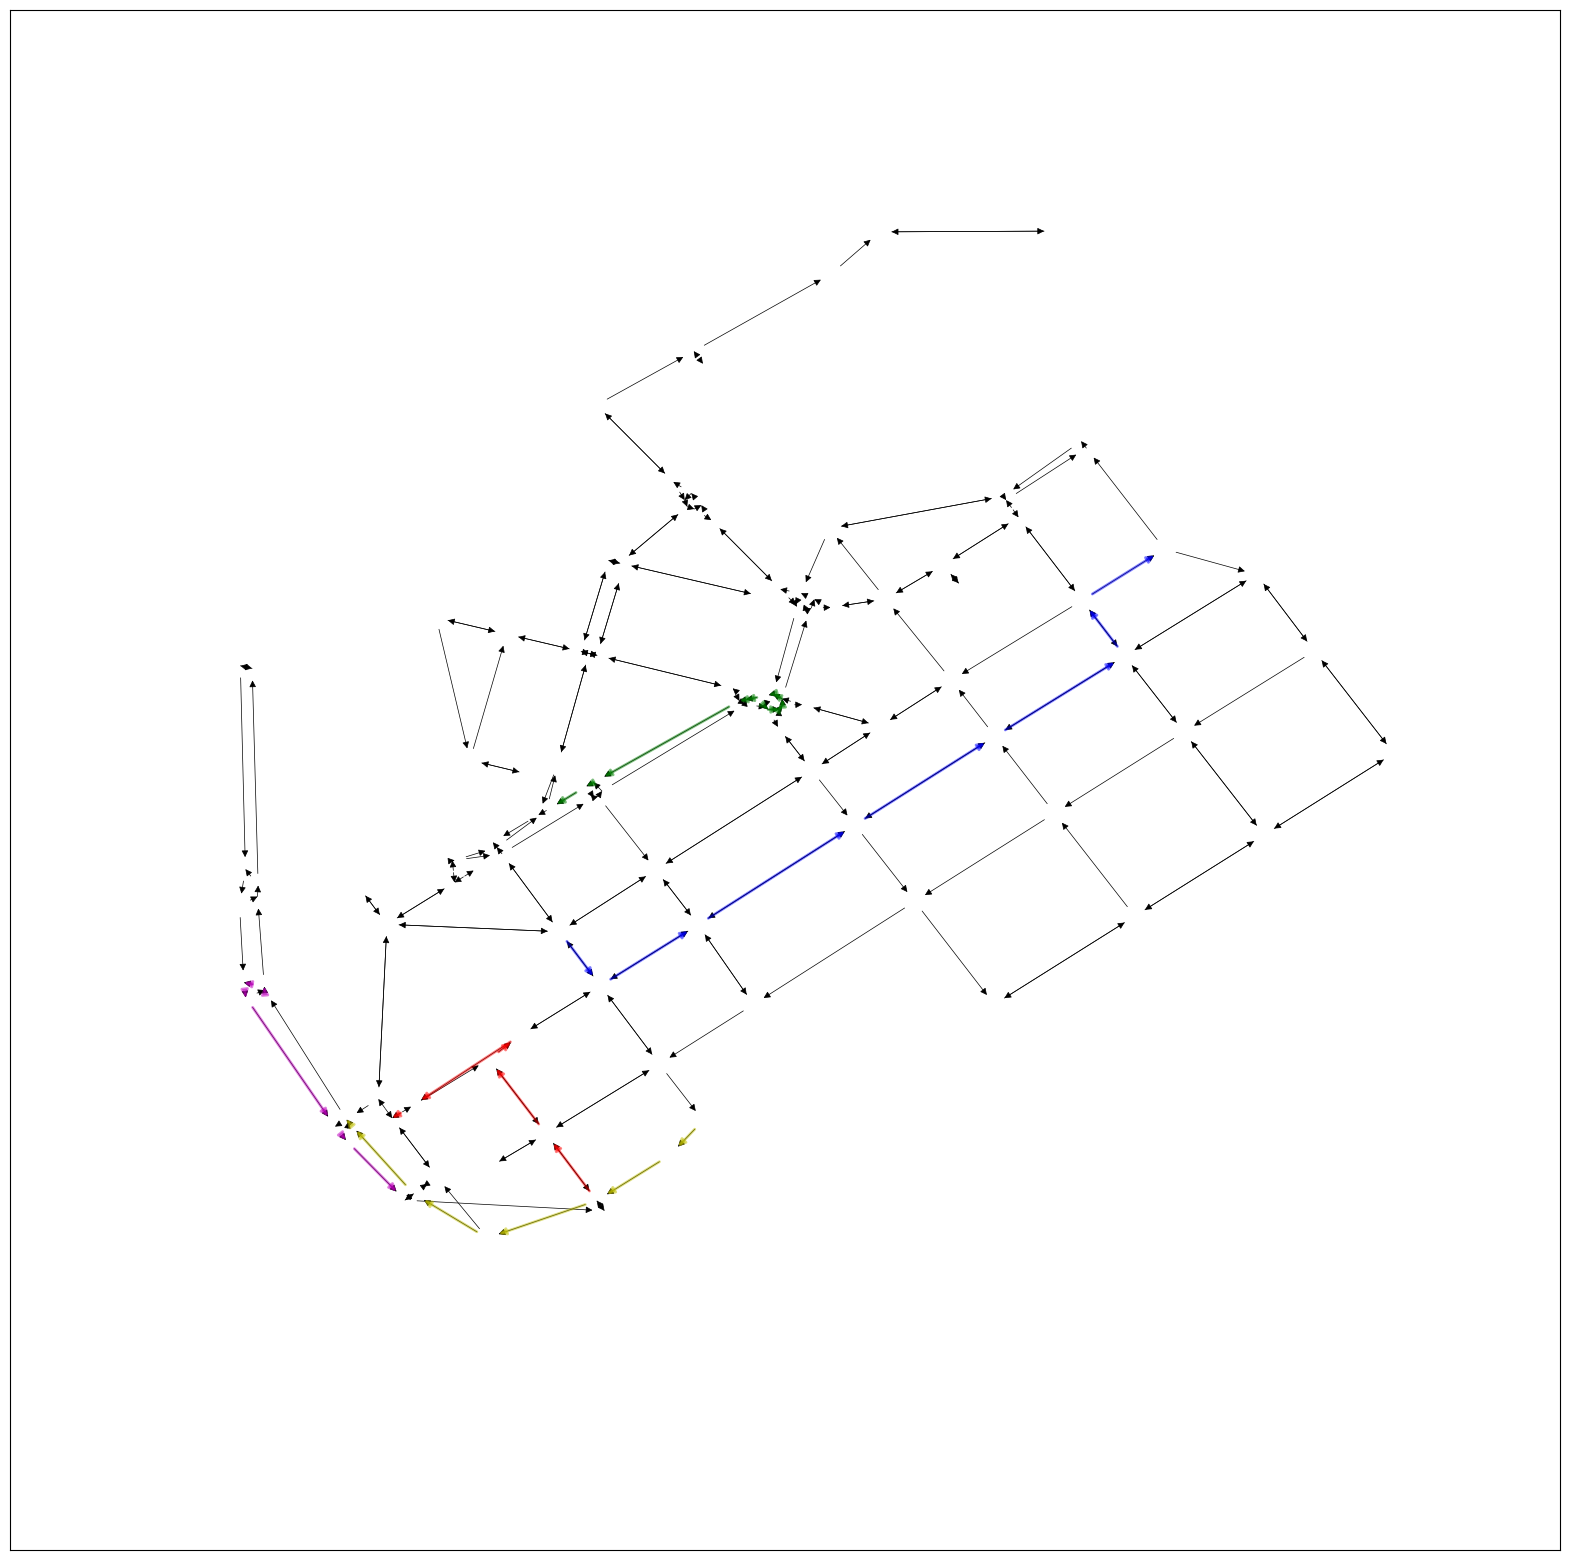

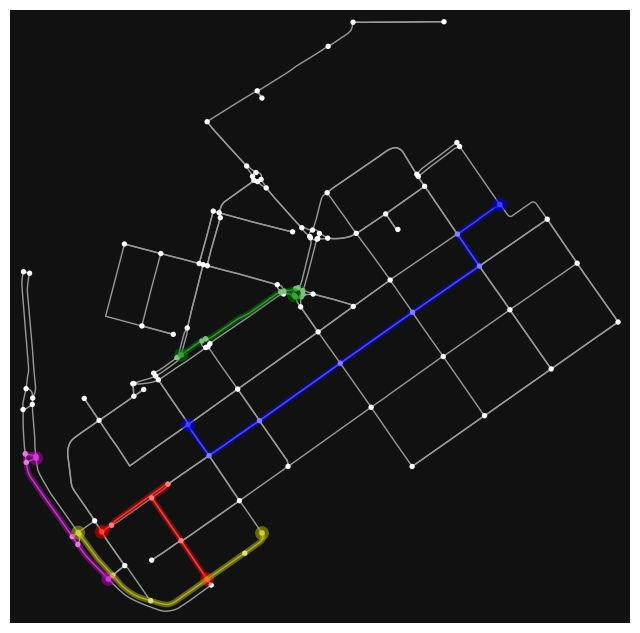

<class 'problem.Lingen'>:
113.78485 glej success True


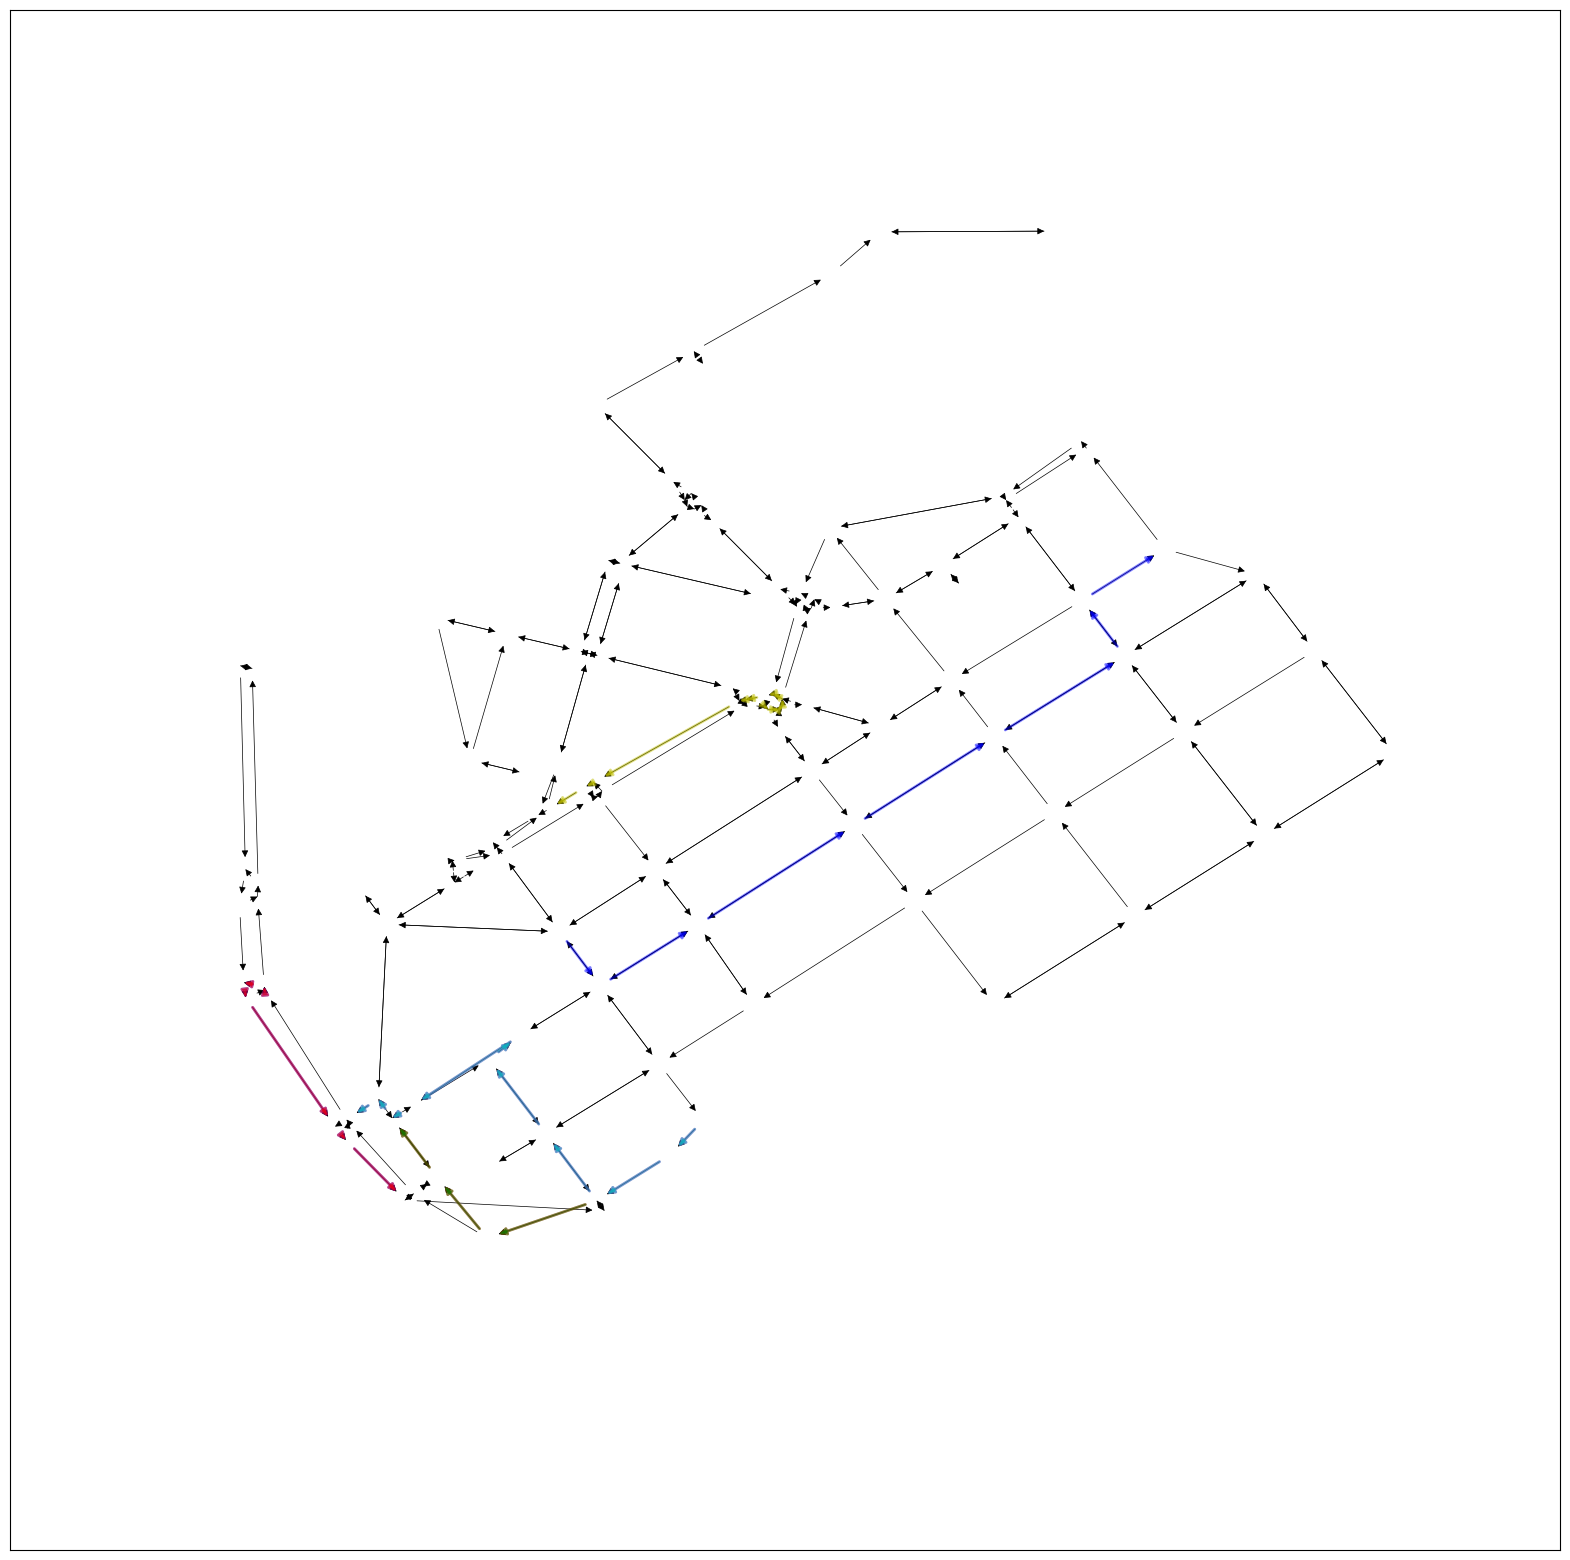

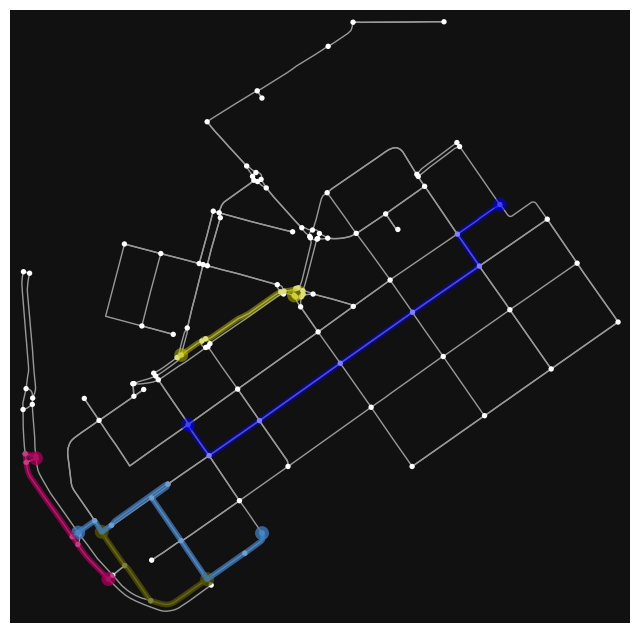

<class 'problem.Greedy'>:
110.57805 glej success True


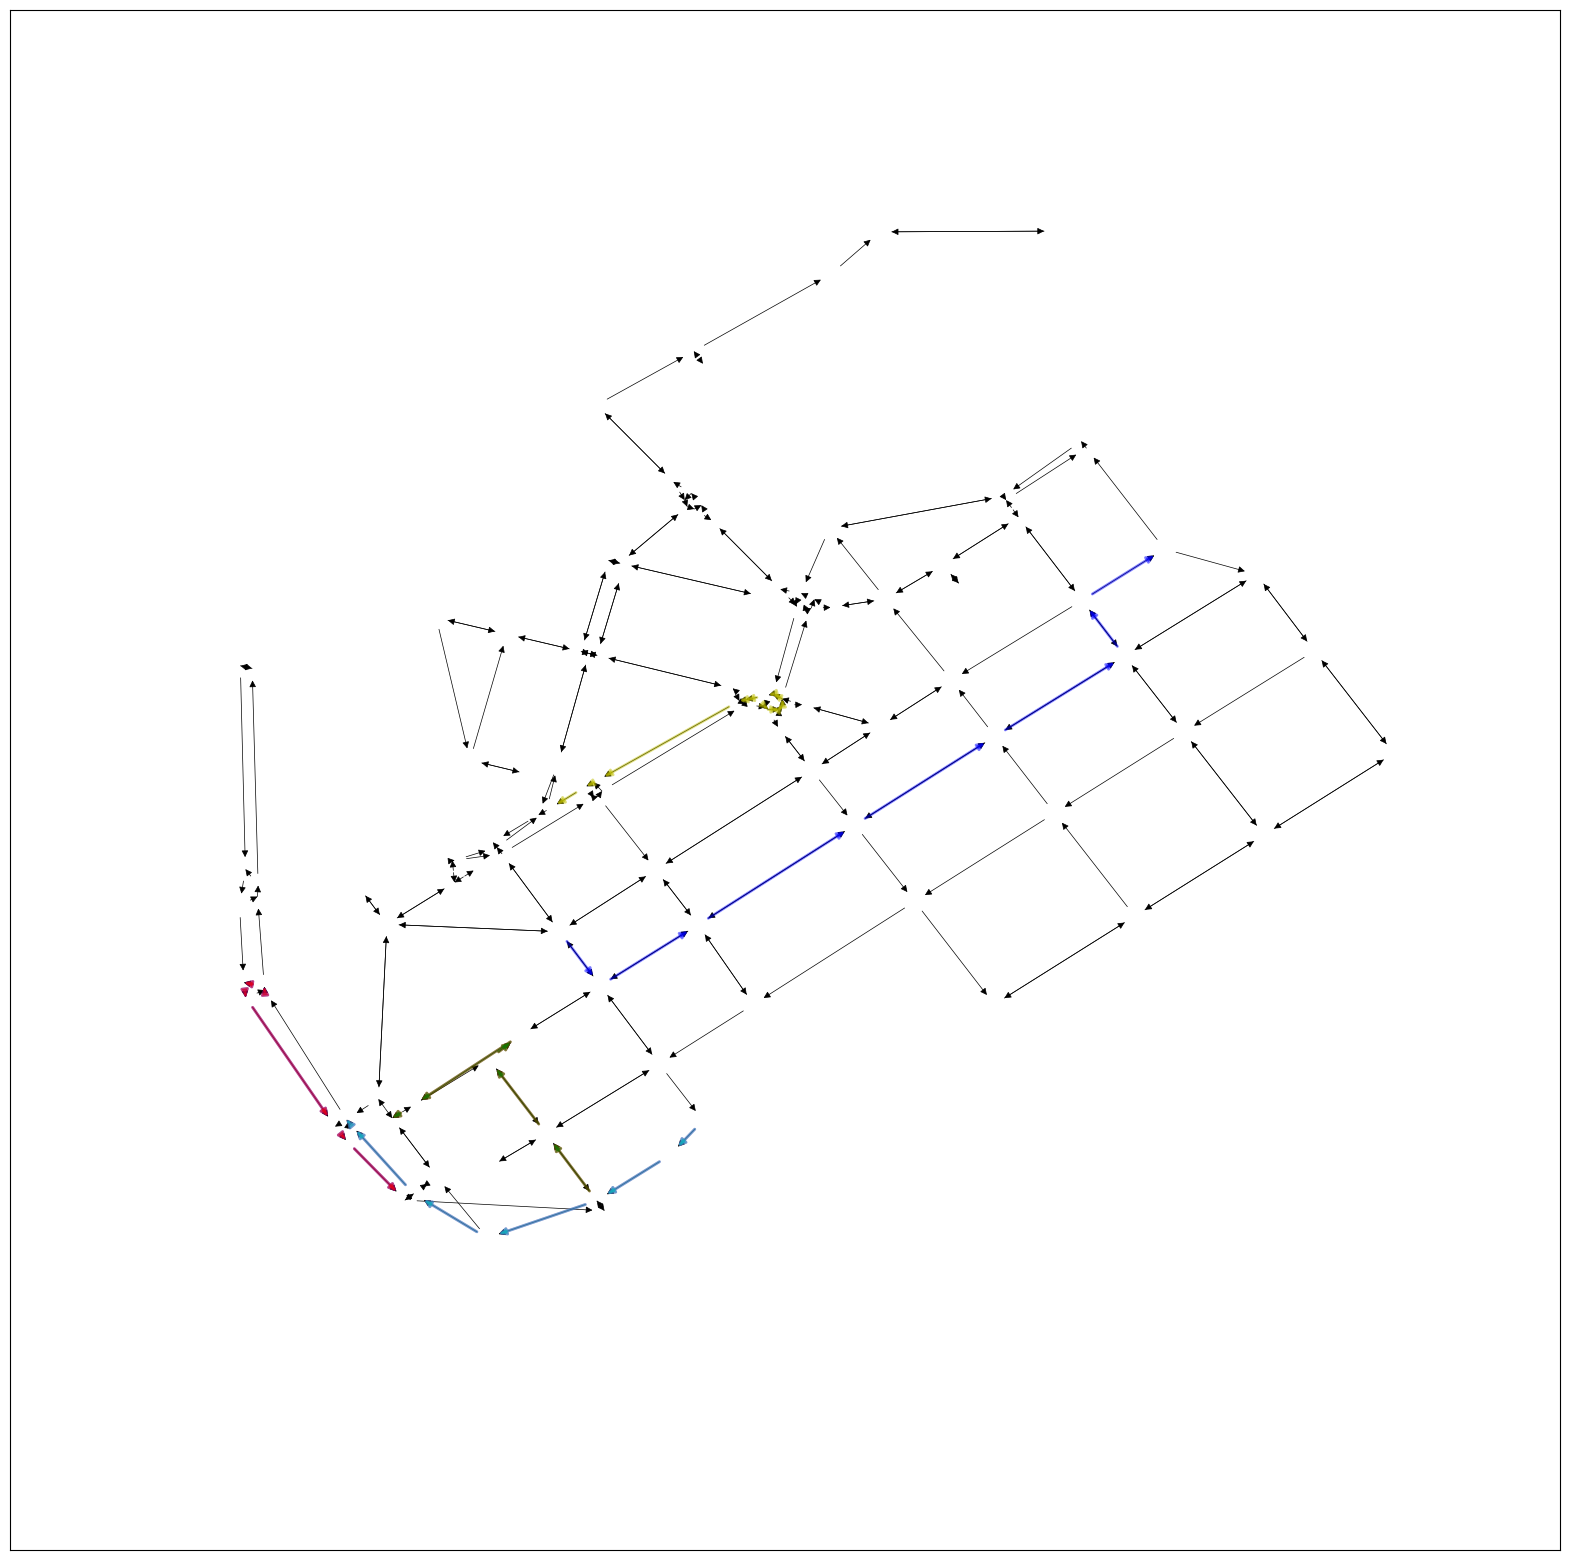

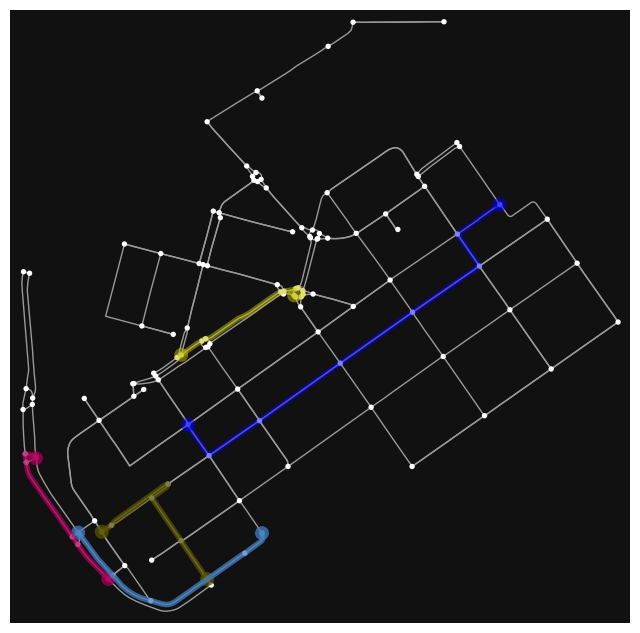

In [5]:
importlib.reload(pr)
# p = pr.Problem(graph, None, ZK = None, ZK_shape=(1,3), ZK_seed = 14, c_mode = 2, t_mode= "time")
p = pr.Problem(graph, None, ZK = None, ZK_shape=(5,2), ZK_seed = 14, c_mode = 2, t_mode= "time")

pr.Linprog_v1.solve(p)
pr.Linprog_v2.solve(p,st_alternativ=3)
pr.Lingen.solve(p,num_iter=100,mutation_prob=0.9,crossover_prob=0.1)
pr.Greedy.solve(p)
pr.Problem.draw(p,all_sep=False,directed=True)

#x0_seed+=1

In [6]:
print(p.g.edges())
p.results
print(p.ZK)
pr.Problem.print(p)
p.results

[(25216594, 1372425714), (25238874, 1372425713), (25238944, 25216594), (25238944, 319896278), (25291537, 25291591), (25291537, 25291565), (25291537, 25292473), (25291564, 25291565), (25291564, 1377211669), (25291565, 1377211666), (25291565, 25291564), (25291565, 25291537), (25291591, 60170471), (25291591, 1377610493), (25292473, 25291537), (25416262, 60069401), (25416263, 1371748760), (25416263, 282731082), (25416267, 25416262), (56113314, 979855850), (56113314, 846597954), (56115897, 60278325), (56115897, 60072524), (56115897, 295322365), (56116937, 1372376956), (56116937, 1372376935), (56116937, 60004721), (56116937, 1372425724), (57743854, 60070287), (60004721, 1372376937), (60004721, 1372318837), (60004721, 268177652), (60004721, 56116937), (60069401, 25416262), (60070287, 1372441203), (60070287, 57743854), (60072524, 56115897), (60072524, 267117319), (60072524, 3177642345), (60170470, 1377211668), (60170470, 1377211669), (60170471, 1377211668), (60170471, 1372441170), (60170471, 1

{"<class 'problem.Linprog_v1'>": {'X': array([[ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  2.],
         [ 0.,  0.,  0.,  0.,  0.],
         ...,
         [-0.,  0., -0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.]]),
  'fun': 110.57805,
  'message': 'Optimization terminated successfully. (HiGHS Status 7: Optimal)',
  'success': True,
  'paths': None},
 "<class 'problem.Linprog_v2'>3": {'X': array([[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]),
  'fun': 110.57805,
  'message': 'Optimization terminated successfully. (HiGHS Status 7: Optimal)',
  'success': True,
  'paths': [[56116937,
    60004721,
    1372376937,
    1372441170,
    60170471,
    1377211668,
    1371750095,
    1371750097],
   [266159806, 1372318831, 149143065, 268177652, 1007980689, 1372425705],
   [267117317,
    846597945,

In [13]:
XX = p.results[list(p.results)[1]]["X"]

In [19]:
list(graph.nodes(data = True))[0][1]["x"]

24.9210566

In [8]:
# importlib.reload(pr)
# p = pr.Problem(graph, None, ZK = None, ZK_shape=(1,2), ZK_seed = 16, c_mode = 2, t_mode= "time")
# #p = pr.Problem(graph, None, ZK = None, ZK_shape=(5,2), ZK_seed = 14, c_mode = 2, t_mode= "time")
# print(p.ZK)
# pr.Linprog_v1.solve(p)
# #pr.Linprog_v2.solve(p,st_alternativ=3)
# #pr.Lingen.solve(p,num_iter=100,mutation_prob=0.9,crossover_prob=0.1)
# pr.Greedy.solve(p)
# pr.Problem.draw(p,all_sep=False,directed=True)

[(1861896877, 1372376956, 2)]
An alternative path wasn't found.
f_c_sums:  0 0.0
<class 'problem.Linprog_v1'>:
19.137033333333335 Optimization terminated successfully. (HiGHS Status 7: Optimal) True


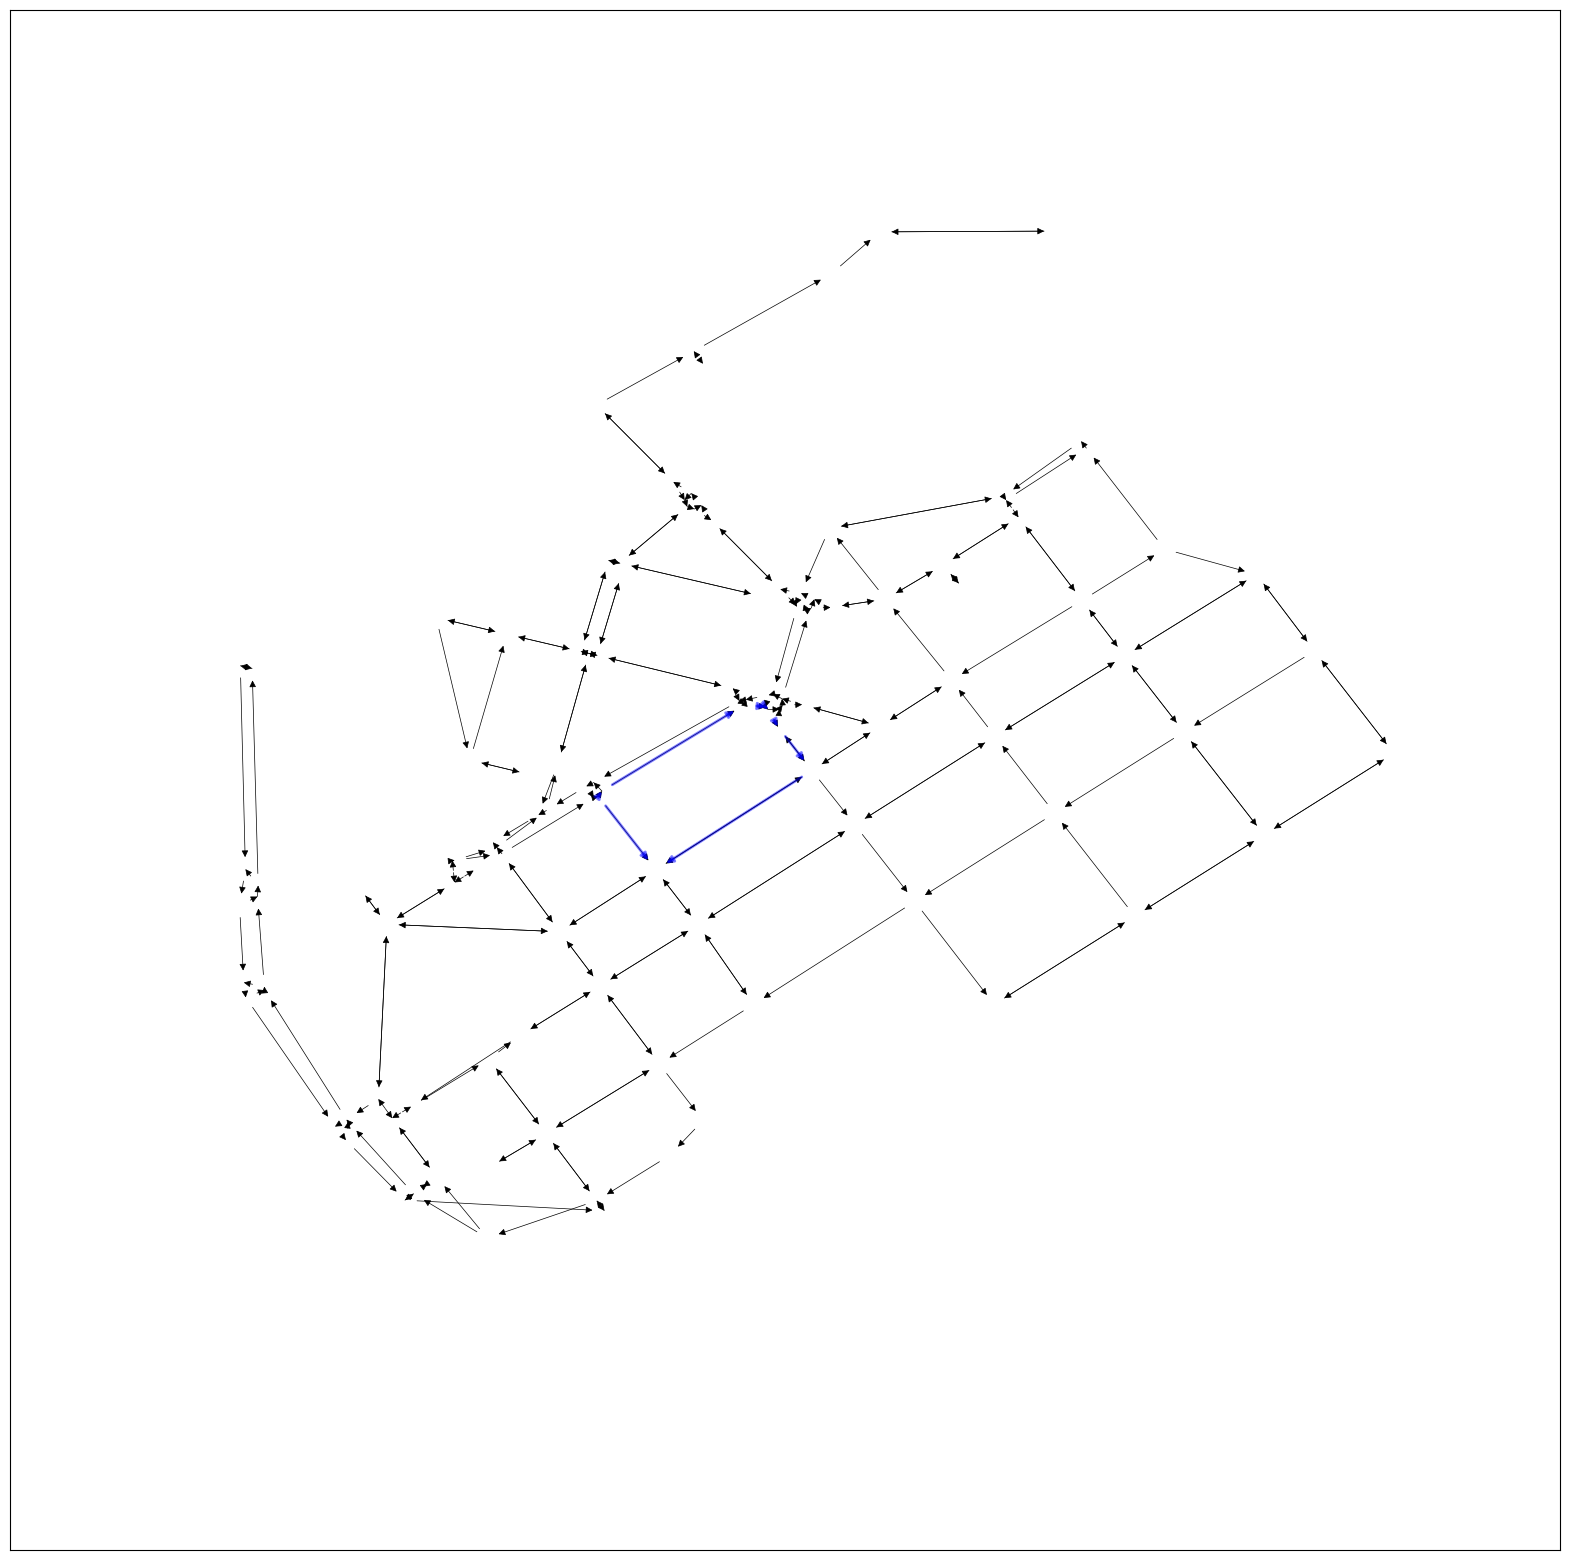

<class 'problem.Linprog_v2'>3:
19.137033333333335 Optimization terminated successfully. (HiGHS Status 7: Optimal) True


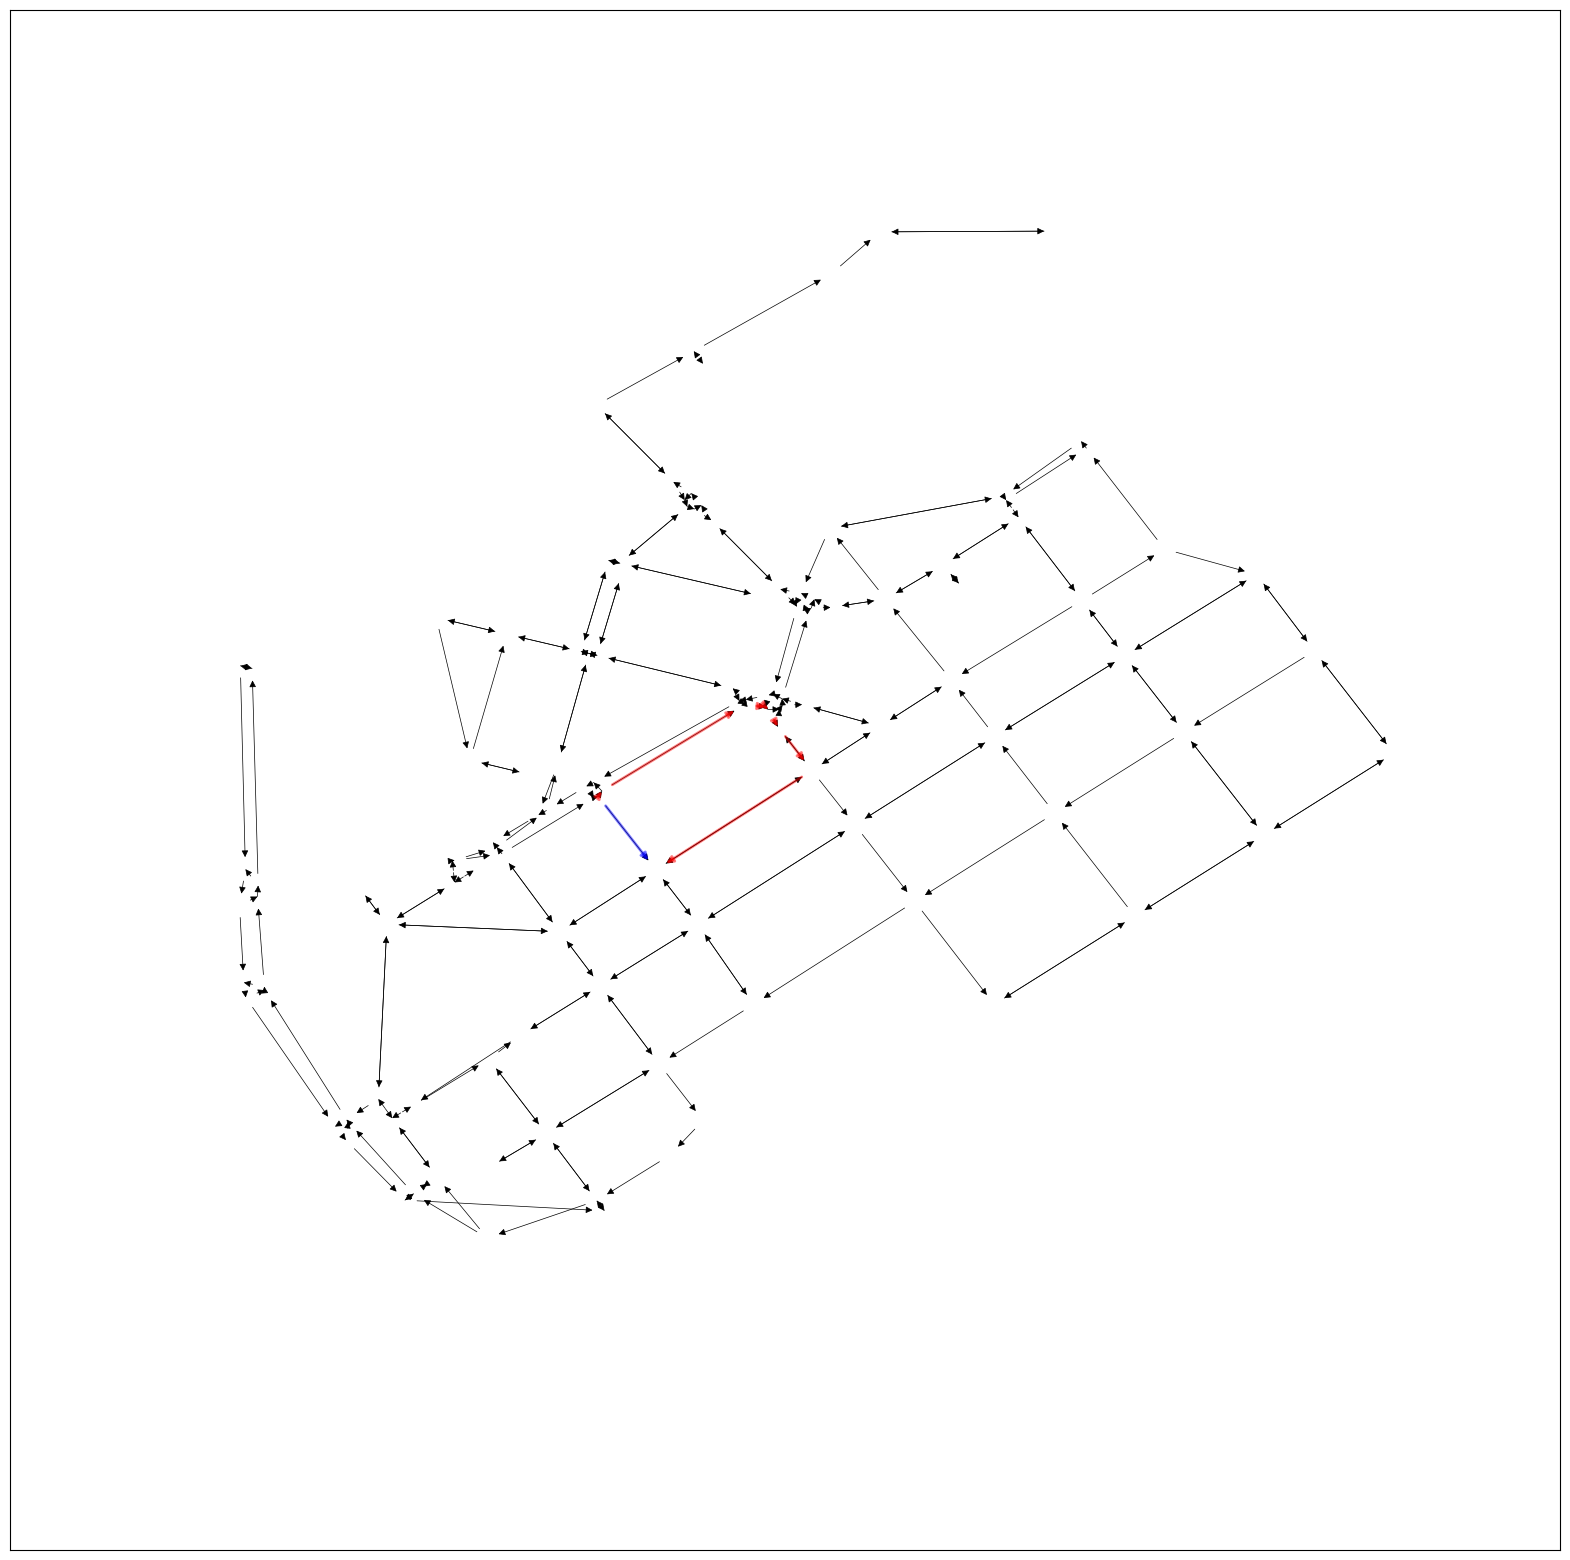

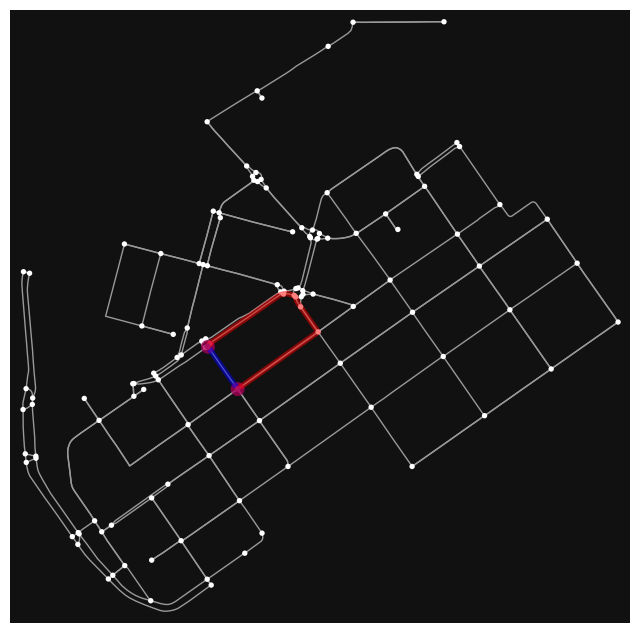

<class 'problem.Lingen'>:
19.137033333333335 glej success True


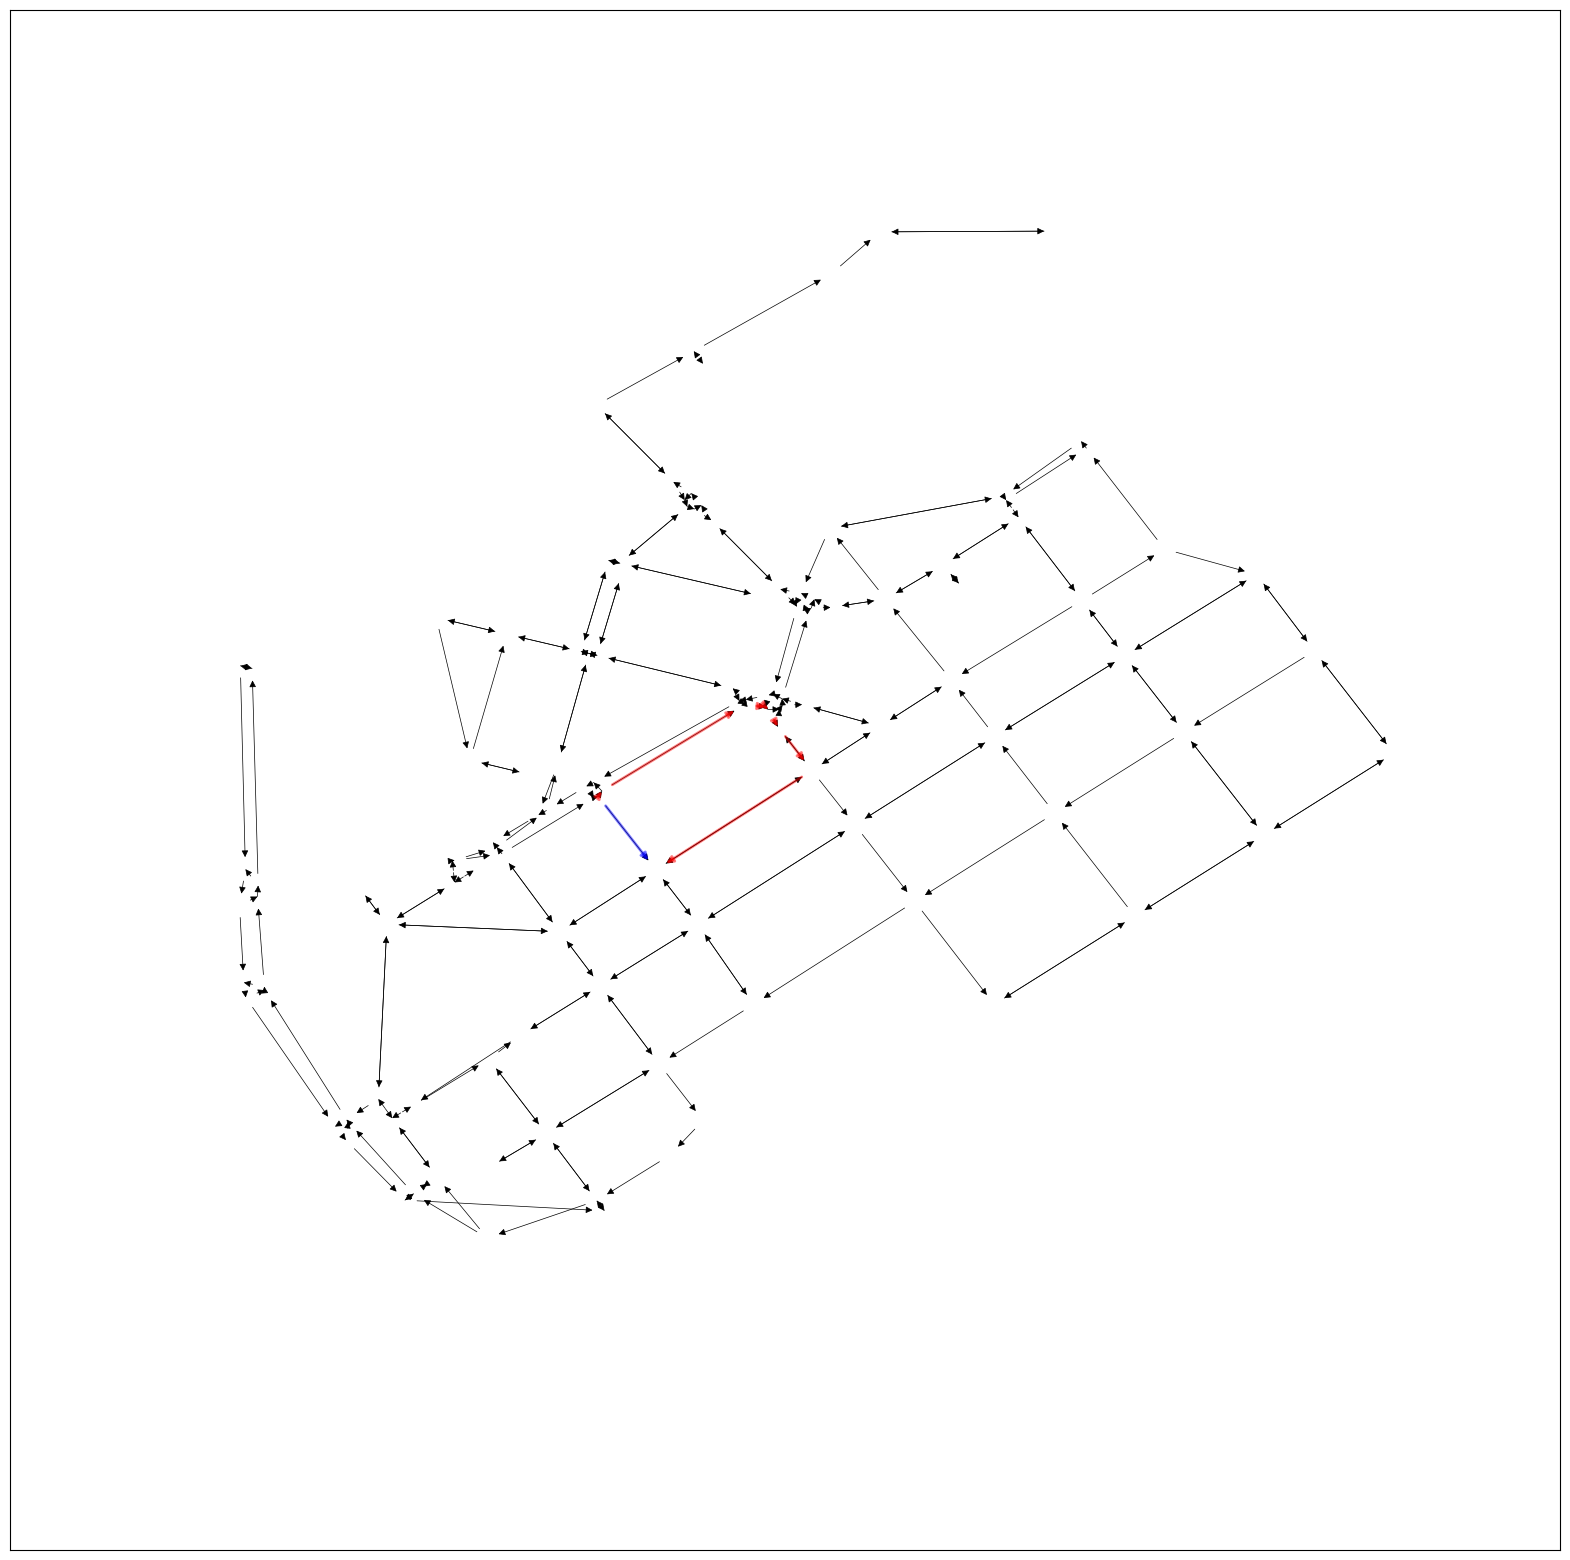

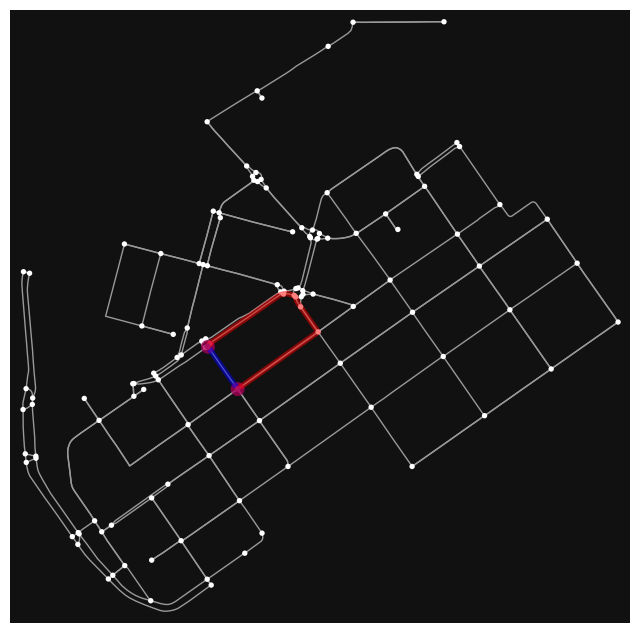

<class 'problem.Greedy'>:
19.137033333333335 glej success True


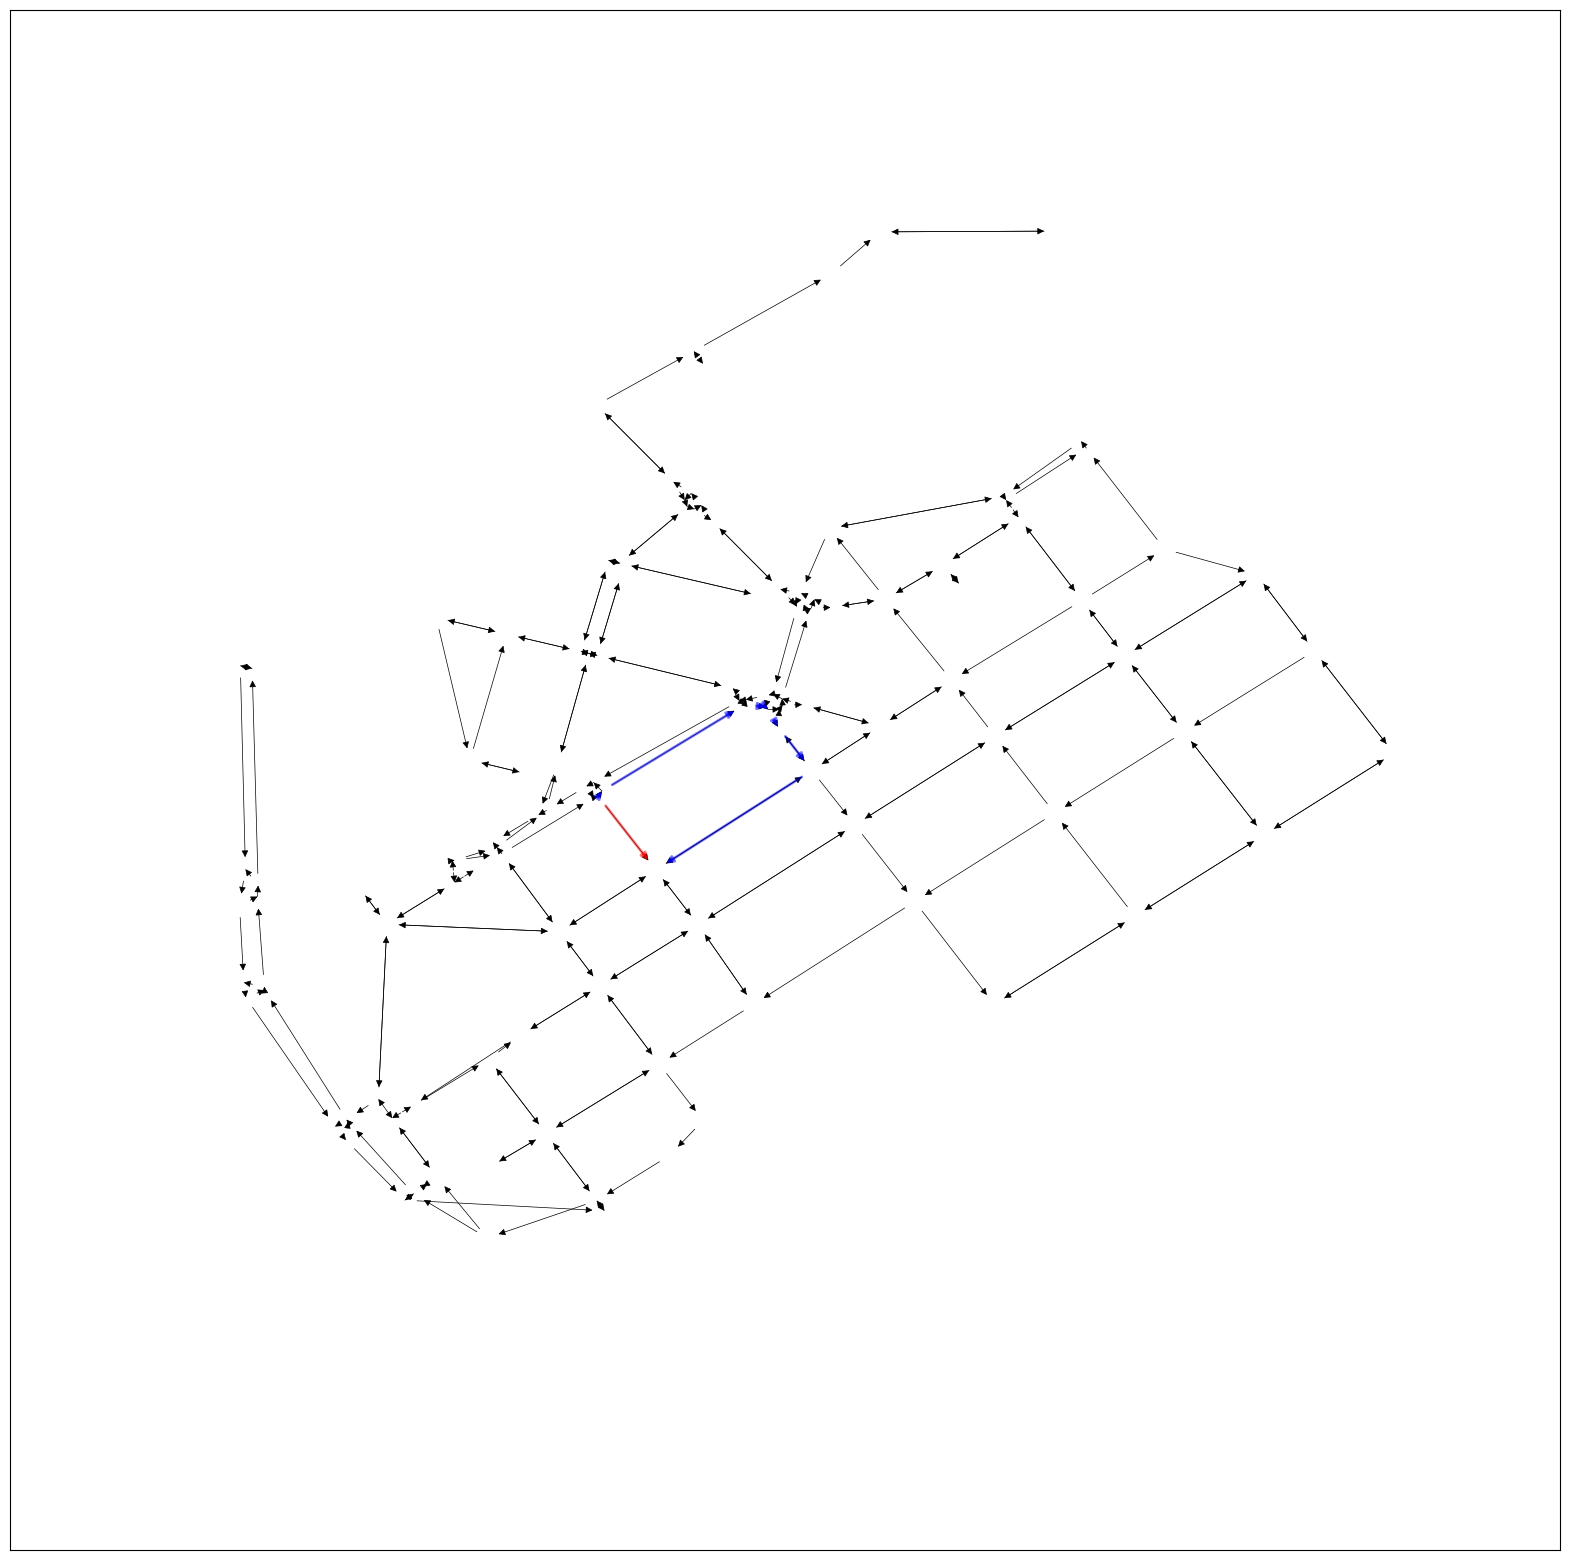

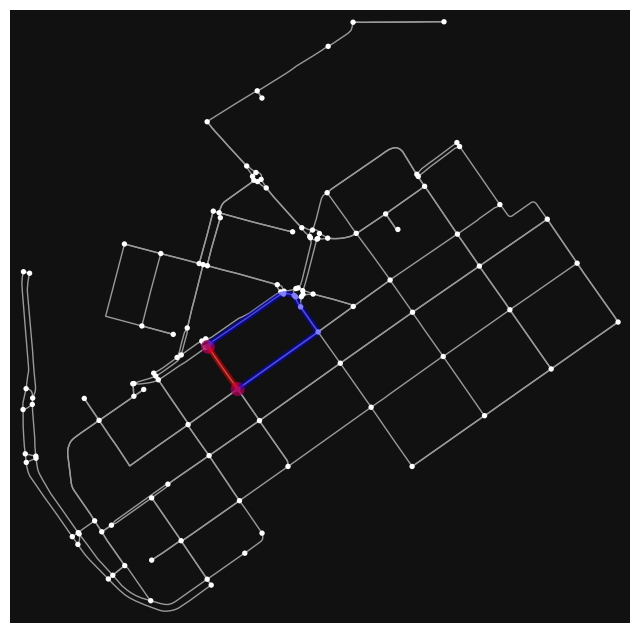

In [9]:
importlib.reload(pr)
p = pr.Problem(graph, None, ZK = [(1861896877, 1372376956, 2)], c_mode = 1, t_mode= "time")
#p = pr.Problem(graph, None, ZK = None, ZK_shape=(5,2), ZK_seed = 14, c_mode = 2, t_mode= "time")
print(p.ZK)
pr.Linprog_v1.solve(p)
pr.Linprog_v2.solve(p,st_alternativ=3)
pr.Lingen.solve(p,num_iter=100,mutation_prob=0.9,crossover_prob=0.1)
pr.Greedy.solve(p)
pr.Problem.draw(p,all_sep=False,directed=True)